<a href="https://colab.research.google.com/github/Selestrino07/an-fatec2025-turma2/blob/main/C%C3%B3pia_de_ATIVIDADE_130325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importação de biblitecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats



In [2]:

!pip install squarify  --upgrade
!pip install plotly


#Carregamento DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Carregar o arquivo CSV
credit_data = pd.read_csv('/content/drive/MyDrive/am5t2/am5s/credit_data.csv')

1.	Entenda a Estrutura dos Dados
o	Visualize as primeiras linhas da base de dados e verifique os tipos de variáveis.
o	Identifique valores ausentes ou inconsistentes.


In [5]:
# Visualizar as primeiras 5 linhas da base de dados
credit_data.head()
# Verificar a forma do DataFrame (linhas, colunas)
credit_data.shape
# Verificar os tipos de variáveis
credit_data.dtypes
# Identificar valores ausentes
credit_data.isnull().sum()
# Verificar inconsistências em 'age'
credit_data[credit_data['age'] < 0]


,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [6]:
# Visualizar as primeiras 5 linhas da base de dados
print(credit_data.shape)

(2000, 5)


In [7]:
# Verificar os tipos de variáveis
print(credit_data.dtypes)

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object


In [8]:
# Identificar valores ausentes
print(credit_data.isnull().sum())

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64


In [ ]:
# Verificar inconsistências em 'age'
print(credit_data[credit_data['age'] < 0])


    clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0


2.	Análise Estatística Geral
o	Calcule médias, medianas, desvios padrão e distribuições das principais variáveis numéricas.
o	Identifique a presença de outliers e distribuições assimétricas


In [9]:
# 1. Cálculos de Média, Mediana e Desvio Padrão
#Media
media_idade = credit_data['age'].mean()
media_renda = credit_data['income'].mean()
media_emprestimo = credit_data['loan'].mean()

#Mediana
lista_valores = [2, 4, 6, 8, 10]
lista_ordenada = sorted(lista_valores)
tamanho_lista = len(lista_ordenada)
indice_mediana = tamanho_lista // 2

# Verifica se a lista possui um número par de elementos
if tamanho_lista % 2 == 0:
    mediana = (lista_ordenada[indice_mediana - 1] + lista_ordenada[indice_mediana]) / 2
else:
    mediana = lista_ordenada[indice_mediana]

print("A mediana é:", mediana)

#desvio_padrao
desvio_padrao = np.std(credit_data)
print("Desvio padrão:", desvio_padrao)



def dect_Outliers(dados):
    # Calculando os quartis Q1 e Q3
    q1 = np.percentile(dados, 25)
    q3 = np.percentile(dados, 75)

    # Intervalo Interquartil (IIQ)
    iiq = q3 - q1

    # Calculando limite inferior e superior
    limite_inferior = q1 - 1.5 * iiq
    limite_superior = q3 + 1.5 * iiq

    # Identificando outliers
    outliers = [x for x in dados if x < limite_inferior or x > limite_superior]

    # Mensagem de retorno
    if len(outliers) == 0:
        print('Não há Outliers nessa variável!')
    else:
        print(f'Há {len(outliers)} outliers: {outliers}')

    return outliers

# Exemplo de aplicação da função
Rendas = [2000, 2500, 3000, 3500, 4000, 7000, 8000, 9000, 10000, 15000]
outliers = dect_Outliers(Rendas)


A mediana é: 6
Desvio padrão: clientid      577.350197
income      14322.745089
age            13.621058
loan         3044.648577
default         0.348537
dtype: float64
Não há Outliers nessa variável!


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


3.	Correlação Entre Variáveis
o	Utilize um mapa de calor (heatmap) para visualizar as correlações entre os atributos.
o	Identifique quais variáveis têm maior impacto no risco de crédito


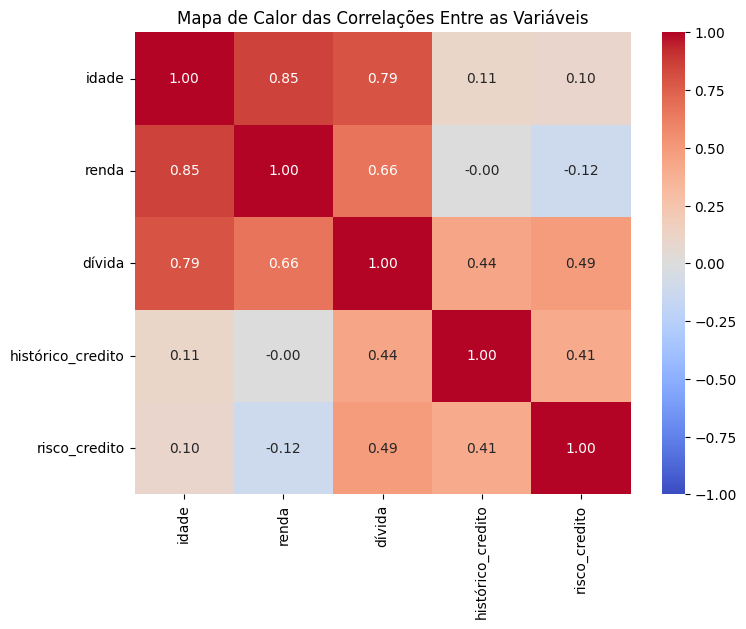

Correlação com 'risco_credito':
idade                0.100083
renda               -0.115470
dívida               0.485903
histórico_credito    0.408248
risco_credito        1.000000
Name: risco_credito, dtype: float64


In [10]:
# Exemplo de conjunto de dados de risco de crédito
# Suponha que você tenha um DataFrame pandas com várias variáveis
dados = pd.DataFrame({
    'idade': [25, 34, 45, 50, 23, 36, 41, 55, 60, 29],
    'renda': [3000, 5000, 8000, 7000, 4500, 6000, 7500, 6500, 8500, 4000],
    'dívida': [500, 1200, 800, 1500, 200, 700, 1200, 1100, 1300, 600],
    'histórico_credito': [0, 1, 0, 1, 0, 1, 1, 1, 0, 1],  # 0 = ruim, 1 = bom
    'risco_credito': [1, 1, 0, 1, 0, 0, 1, 1, 0, 0]  # 0 = baixo risco, 1 = alto risco
})

# 1. Calcular a correlação entre as variáveis numéricas
correlacoes = dados.corr()

# 2. Criar um mapa de calor para visualizar as correlações
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title("Mapa de Calor das Correlações Entre as Variáveis")
plt.show()

# 3. Identificar as variáveis com maior impacto no risco de crédito
# Olhando para a coluna de 'risco_credito' para ver quais variáveis têm correlação mais forte com ela
print("Correlação com 'risco_credito':")
print(correlacoes['risco_credito'])

4.	Distribuição de Clientes Aprovados e Negados
o	Crie gráficos de barras para visualizar a proporção de clientes aprovados e negados.
o	Avalie quais fatores mais influenciam a decisão final.




<ipython-input-11-201aa0d318bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='aprovado', data=dados, palette='coolwarm')


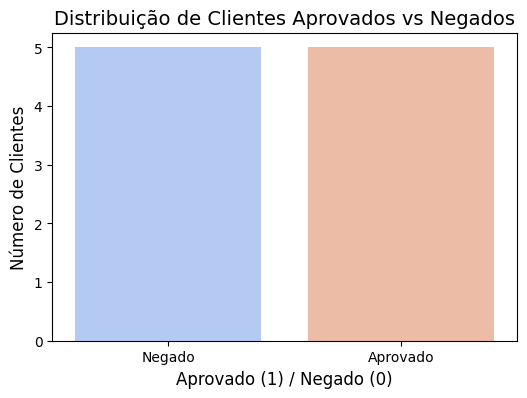

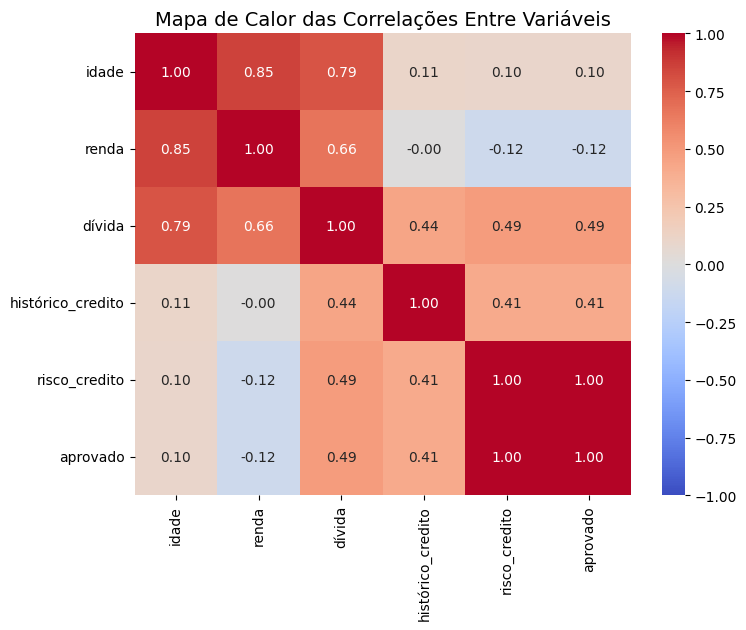

Correlação com 'aprovado':
 idade                0.100083
renda               -0.115470
dívida               0.485903
histórico_credito    0.408248
risco_credito        1.000000
aprovado             1.000000
Name: aprovado, dtype: float64


<ipython-input-11-201aa0d318bd>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aprovado', y='renda', data=dados, palette='coolwarm')


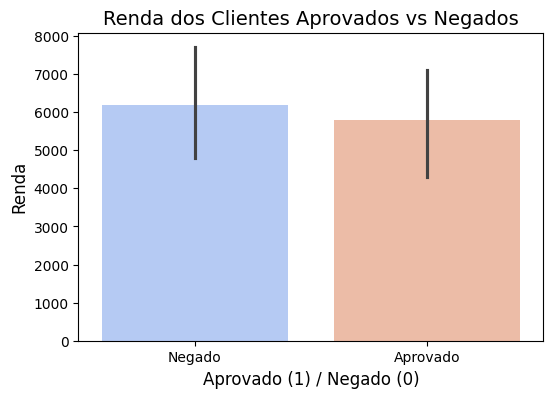

<ipython-input-11-201aa0d318bd>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aprovado', y='dívida', data=dados, palette='coolwarm')


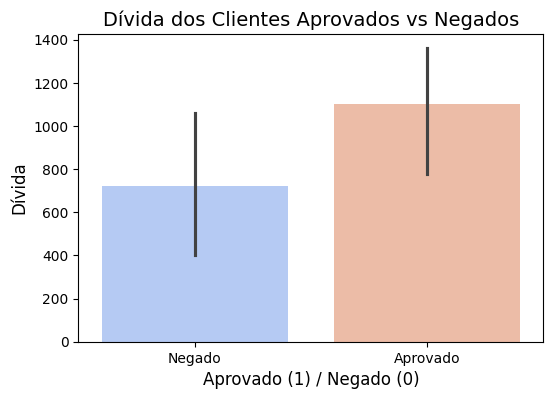

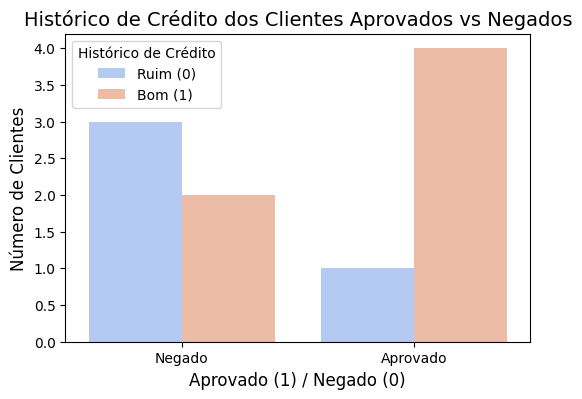

In [11]:


# Função para plotar a distribuição de clientes aprovados e negados
def plot_distribuicao_aprovados_negados(dados):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='aprovado', data=dados, palette='coolwarm')
    plt.title('Distribuição de Clientes Aprovados vs Negados', fontsize=14)
    plt.xlabel('Aprovado (1) / Negado (0)', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks([0, 1], ['Negado', 'Aprovado'])
    plt.show()

# Função para plotar a correlação das variáveis
def plot_correlacao(dados):
    correlacoes = dados.corr()  # Calcular as correlações
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Mapa de Calor das Correlações Entre Variáveis', fontsize=14)
    plt.show()

# Função para analisar os fatores que influenciam a decisão de aprovação
def analisar_fatores_impacto(dados):
    # 1. Exibir correlação com a variável 'aprovado'
    correlacoes = dados.corr()
    print("Correlação com 'aprovado':\n", correlacoes['aprovado'])

    # 2. Gráficos de comparação
    # Comparação da variável 'renda' com base na aprovação
    plt.figure(figsize=(6, 4))
    sns.barplot(x='aprovado', y='renda', data=dados, palette='coolwarm')
    plt.title('Renda dos Clientes Aprovados vs Negados', fontsize=14)
    plt.xlabel('Aprovado (1) / Negado (0)', fontsize=12)
    plt.ylabel('Renda', fontsize=12)
    plt.xticks([0, 1], ['Negado', 'Aprovado'])
    plt.show()

    # Comparação da variável 'dívida' com base na aprovação
    plt.figure(figsize=(6, 4))
    sns.barplot(x='aprovado', y='dívida', data=dados, palette='coolwarm')
    plt.title('Dívida dos Clientes Aprovados vs Negados', fontsize=14)
    plt.xlabel('Aprovado (1) / Negado (0)', fontsize=12)
    plt.ylabel('Dívida', fontsize=12)
    plt.xticks([0, 1], ['Negado', 'Aprovado'])
    plt.show()

    # Comparação de 'histórico_credito' com base na aprovação (gráfico de barras)
    plt.figure(figsize=(6, 4))
    sns.countplot(x='aprovado', hue='histórico_credito', data=dados, palette='coolwarm')
    plt.title('Histórico de Crédito dos Clientes Aprovados vs Negados', fontsize=14)
    plt.xlabel('Aprovado (1) / Negado (0)', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks([0, 1], ['Negado', 'Aprovado'])
    plt.legend(title='Histórico de Crédito', labels=['Ruim (0)', 'Bom (1)'])
    plt.show()

# Exemplo de conjunto de dados de clientes
dados = pd.DataFrame({
    'idade': [25, 34, 45, 50, 23, 36, 41, 55, 60, 29],
    'renda': [3000, 5000, 8000, 7000, 4500, 6000, 7500, 6500, 8500, 4000],
    'dívida': [500, 1200, 800, 1500, 200, 700, 1200, 1100, 1300, 600],
    'histórico_credito': [0, 1, 0, 1, 0, 1, 1, 1, 0, 1],  # 0 = ruim, 1 = bom
    'risco_credito': [1, 1, 0, 1, 0, 0, 1, 1, 0, 0],  # 0 = baixo risco, 1 = alto risco
    'aprovado': [1, 1, 0, 1, 0, 0, 1, 1, 0, 0]  # 1 = aprovado, 0 = negado
})

# 1. Plotar a distribuição de aprovados e negados
plot_distribuicao_aprovados_negados(dados)

# 2. Plotar a correlação entre as variáveis
plot_correlacao(dados)

# 3. Analisar fatores que influenciam a decisão de aprovação
analisar_fatores_impacto(dados)

5.	Relação entre Idade e Aprovação de Crédito
o	Analise se existe uma faixa etária com maior dificuldade para obter crédito.
o	Utilize boxplots para visualizar essa relação.


<ipython-input-12-443856b59ad6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aprovado', y='idade', data=dados, palette='coolwarm')


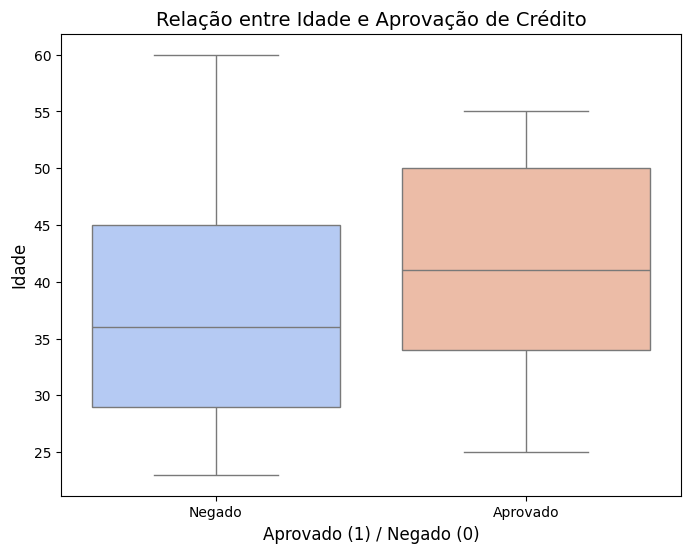

In [12]:
# Função para plotar a relação entre idade e aprovação de crédito
def plot_relacao_idade_aprovado(dados):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='aprovado', y='idade', data=dados, palette='coolwarm')
    plt.title('Relação entre Idade e Aprovação de Crédito', fontsize=14)
    plt.xlabel('Aprovado (1) / Negado (0)', fontsize=12)
    plt.ylabel('Idade', fontsize=12)
    plt.xticks([0, 1], ['Negado', 'Aprovado'])
    plt.show()

# 1. Plotar a relação entre idade e aprovação de crédito
plot_relacao_idade_aprovado(dados)

6.	Impacto da Renda no Score de Crédito
o	Verifique se há uma relação direta entre renda e pontuação de crédito.
o	Utilize scatter plots para representar a tendência.


<ipython-input-13-b41ae1df4d3b>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='renda', y='risco_credito', data=dados, palette='coolwarm', s=100)


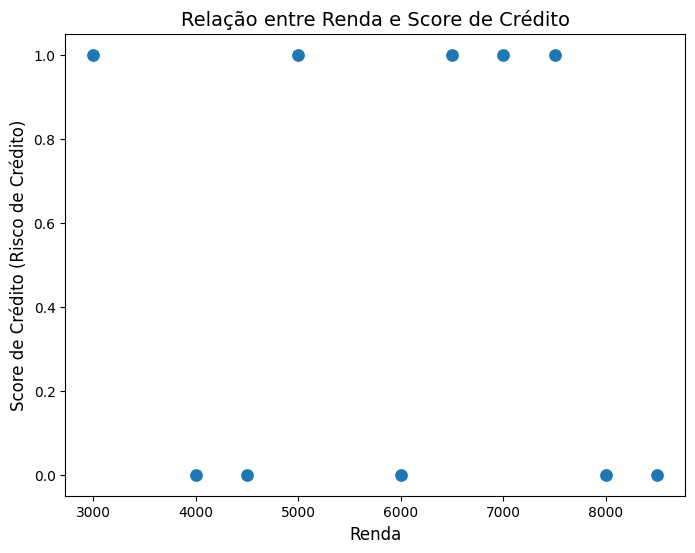

In [13]:
# Função para plotar a relação entre renda e score de crédito (risco_credito)
def plot_relacao_renda_score(dados):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='renda', y='risco_credito', data=dados, palette='coolwarm', s=100)
    plt.title('Relação entre Renda e Score de Crédito', fontsize=14)
    plt.xlabel('Renda', fontsize=12)
    plt.ylabel('Score de Crédito (Risco de Crédito)', fontsize=12)
    plt.show()

# 1. Plotar a relação entre renda e score de crédito
plot_relacao_renda_score(dados)

8.	Tempo de Histórico de Crédito e Aprovação
o	Existe um número mínimo de anos de histórico de crédito para aprovação?
o	Analise essa relação usando gráficos de dispersão.


<ipython-input-14-104ea0eae3be>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='histórico_credito', y='aprovado', data=dados, palette='coolwarm', s=100)


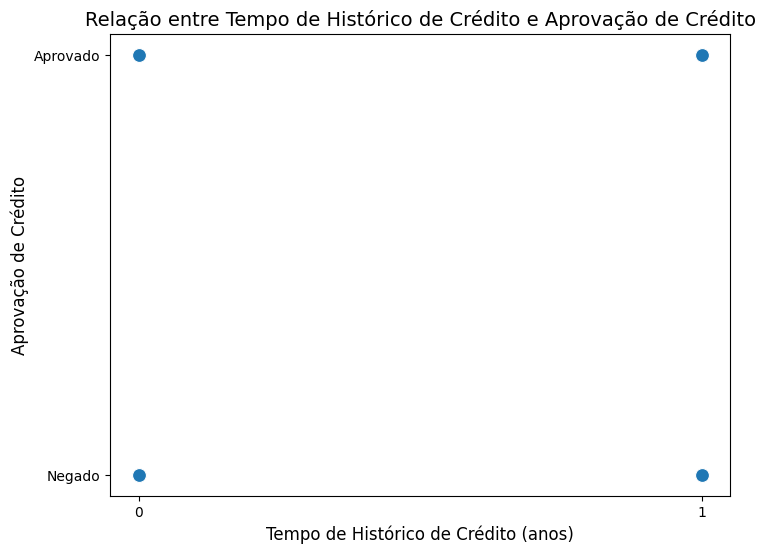

In [14]:
# Função para plotar a relação entre histórico de crédito e aprovação de crédito
def plot_relacao_historico_aprovado(dados):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='histórico_credito', y='aprovado', data=dados, palette='coolwarm', s=100)
    plt.title('Relação entre Tempo de Histórico de Crédito e Aprovação de Crédito', fontsize=14)
    plt.xlabel('Tempo de Histórico de Crédito (anos)', fontsize=12)
    plt.ylabel('Aprovação de Crédito', fontsize=12)
    plt.xticks(range(0, dados['histórico_credito'].max()+1, 1))
    plt.yticks([0, 1], ['Negado', 'Aprovado'])
    plt.show()

# 1. Plotar a relação entre tempo de histórico de crédito e aprovação
plot_relacao_historico_aprovado(dados)


7.	Influência do Grau de Instrução e Estado Civil
o	Explore como diferentes níveis de educação e estado civil impactam a aprovação do crédito.
o	Utilize gráficos de barras para comparação


In [ ]:


# Verificar as colunas do DataFrame para garantir que 'grau_instrucao' e 'aprovacao_credito' existem
print(credit_data.columns)

# Agrupar os dados por grau de instrução e calcular a proporção de aprovações
grau_instrucao_approval = credit_data.groupby('grau_instrucao')['aprovacao_credito'].value_counts(normalize=True).unstack().fillna(0)

# Verifique o conteúdo da variável grau_instrucao_approval
print(grau_instrucao_approval)

# Criar gráfico de barras empilhadas para grau de instrução
plt.figure(figsize=(8, 5))
grau_instrucao_approval.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Aprovação de Crédito por Grau de Instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Proporção de Aprovação')
plt.xticks(rotation=45)
plt.legend(['Não Aprovado', 'Aprovado'])
plt.tight_layout()
plt.show()



In [15]:
# grafico de barras grau de instrução


# Renomeando as colunas para garantir que estão corretas
credit_data.columns = credit_data.columns.str.strip()  # Remove espaços extras
credit_data.rename(columns={'nome_incorreto': 'grau_instrucao'}, inplace=True)

# Verificar as colunas do DataFrame para garantir que 'grau_instrucao' e 'aprovacao_credito' existem
credit_data.columns.shape

# Agora, agrupar os dados por grau de instrução e calcular a proporção de aprovações
grau_instrucao_approval = credit_data.groupby('grau_instrucao')['aprovacao_credito'].value_counts(normalize=True).unstack().fillna(0)

# Verifique o conteúdo da variável grau_instrucao_approval
grau_instrucao_approval.shape

# Criar gráfico de barras empilhadas para grau de instrução
grau_instrucao_approval.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(8, 5))

# Adicionar título e rótulos
plt.title('Aprovação de Crédito por Grau de Instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Proporção de Aprovação')

# Ajustar a rotação dos rótulos no eixo X
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()



KeyError: 'grau_instrucao'

In [16]:
#grafico de estado civil


10.	Conclusões e Recomendações para Modelagem
•	Com base nos insights obtidos, quais variáveis parecem mais relevantes para um modelo de aprendizado de máquina?
•	Há necessidade de engenharia de features ou tratamento de dados para melhorar a qualidade do modelo?


9.	Endividamento e Score de Crédito
o	Pessoas com maior endividamento têm pontuações de crédito mais baixas?
o	Utilize gráficos de dispersão e histogramas para validar essa hipótese.


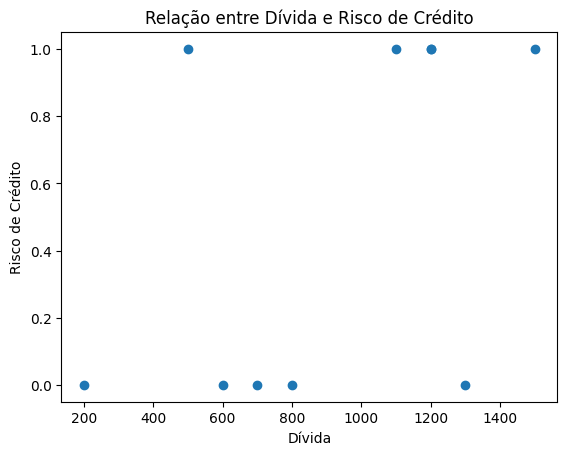

In [17]:
#gráfico de dispersão

plt.scatter(dados['dívida'], dados['risco_credito'])
plt.xlabel('Dívida')
plt.ylabel('Risco de Crédito')
plt.title('Relação entre Dívida e Risco de Crédito')
plt.show()


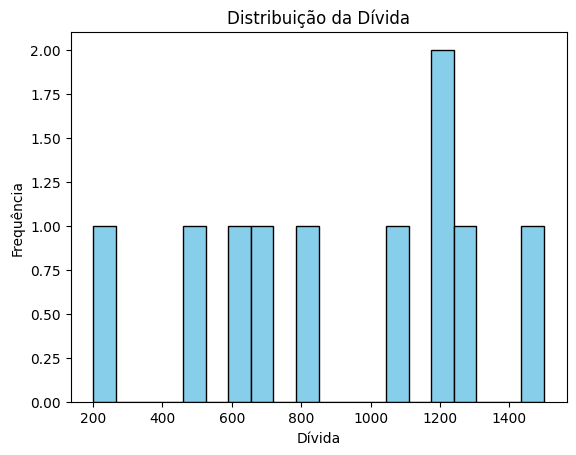

In [ ]:
#gráfico de histograma

plt.hist(dados['dívida'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Dívida')
plt.ylabel('Frequência')
plt.title('Distribuição da Dívida')
plt.show()

10.	Conclusões e Recomendações para Modelagem
•	Com base nos insights obtidos, quais variáveis parecem mais relevantes para um modelo de aprendizado de máquina?
•	Há necessidade de engenharia de features ou tratamento de dados para melhorar a qualidade do modelo?
